# Nested CV

# Business Case:


### Overview:

**This dataset contains sales information for various cola brands in Athens, Greece. Each record provides details about the sales of different cola products, including the date of sale, location, product specifications (such as brand, container type, and capacity), and the quantity sold. The dataset captures the nuances of consumer preferences and sales patterns over time, which is critical for understanding market dynamics and making data-driven business decisions.**


### Benefits

**Increased Revenue: By accurately forecasting demand, the company can ensure that popular products are always in stock, potentially increasing sales.
Cost Savings: Improved inventory management can reduce the costs associated with overstock and stockouts.
Better Marketing ROI: Insights into consumer preferences and sales trends can lead to more effective marketing and promotional campaigns.
Enhanced Customer Satisfaction: By ensuring the availability of preferred products, customer satisfaction can be improved, leading to higher customer loyalty.**


### Stakeholders

**Sales and Marketing Teams: To understand market trends and customer preferences.
Supply Chain and Inventory Managers: To improve inventory management and demand planning.
Pricing Analysts: To develop and refine pricing strategies.
Executive Management: To make strategic decisions based on comprehensive market and sales data.**

# Objectives

##### 1. Implement the nested time series cross validation strategy for grouped forecasting.
    a. User should provide the dataset, time column and the number of folds to generate
    b. For the given dataset, we will use **"day"** as a single time unit. This means you can split the data at day level
    
##### 2. Write you code in sci-kit learn format. The class should work on pandas dataframes and a datetime column name.


##### 3. Test your code with some samples.


##### 4. Build a time series model on the dataset above and evaluate it using your cross validation method. Submit the notebook illustrating the model development.


##### 5. Submit the code, test samples and any other recorded observations

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from types import GeneratorType
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [25]:
data = pd.read_csv("train.csv")
data.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


# Domain Analysis


### Industry Context

**The dataset is representative of the beverage industry, specifically focusing on the non-alcoholic carbonated drinks market. This industry is characterized by high competition, varying consumer preferences, and significant impact of marketing and branding efforts. Seasonal trends and promotional activities often influence sales volumes, making demand forecasting and inventory management critical components of the business strategy.**

### Key Features and Attributes

**Date:** Indicates the day of the sale, essential for time series analysis and understanding temporal sales patterns.

**City:** Provides location context.

**Latitude and Longitude:** Geographical coordinates of the location.

**Population (pop):** Gives an idea of the market size in the area.

**Shop:** Identifies the retail outlet.

**Brand:** Gives different brands operating in the market.

**Container Type:** Indicates the packaging format (e.g., glass, plastic, can).

**Capacity:** Specifies the volume of the product, important for understanding product size preferences.

**Price:** The selling price of the product, a key factor in sales volume and revenue analysis.

**Quantity:** The number of units sold, the primary measure of sales performance. This is our **Target** variable.



### Implementing the NestedCV class

In [2]:
class NestedCV:
    def __init__(self, k):
        self.k = k

    def split(self, data, date_column):
        # Sort the data by date
        data = data.sort_values(by=date_column)

        # Initialize the outer time series split
        outer_tscv = TimeSeriesSplit(n_splits=self.k + 1)

        for train_val_index, test_index in outer_tscv.split(data):
            # Get the train_val split and test split
            train_val, test = data.iloc[train_val_index], data.iloc[test_index]

            # Initialize the inner time series split
            inner_tscv = TimeSeriesSplit(n_splits=self.k)

            for train_index, val_index in inner_tscv.split(train_val):
                # Get the train and validation split
                train, val = train_val.iloc[train_index], train_val.iloc[val_index]

                yield train, val, test


### Testing the Nested Class with some random sample data.

In [3]:
if __name__ == "__main__":
    # creating a sample data
    data = pd.DataFrame({
        'date': pd.date_range(start='2022-01-01', periods=50),
        'city': ['A']*25 + ['B']*25,
        'quantity': range(50)
    })

    # nested cv
    k = 5
    cv = NestedCV(k)
    splits = cv.split(data, "date")

    # checking return type
    assert isinstance(splits, GeneratorType)

    # checking return types, shapes, and data leaks
    count = 0
    for train, validate, test in splits:
        # types
        assert isinstance(train, pd.DataFrame)
        assert isinstance(validate, pd.DataFrame)
        assert isinstance(test, pd.DataFrame)

        # shape
        assert train.shape[1] == validate.shape[1] == test.shape[1]

        # data leak
        assert train["date"].max() <= validate["date"].min()
        assert validate["date"].max() <= test["date"].min()

        count += 1

    # checking number of splits returned
    assert count == k * (k + 1)
    print(f"Number of splits :{int(count/(k+1))}")

Number of splits :5


## Loading Dataset

In [4]:
data = pd.read_csv("train.csv")
data.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


## Basic Checks of Data & Data Preprocessing

In [5]:
data.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


In [6]:
data.shape

(7560, 12)

In [7]:
data.describe()

,id,lat,long,pop,price,quantity
count,6480.000000,6429.000000,6434.000000,6480.000000,6480.000000,6480.000000
mean,3239.500000,38.301238,23.270246,355141.416667,1.188981,29431.855093
std,1870.759204,1.649771,1.086960,232828.796289,0.814567,17901.328301
min,0.000000,35.327870,21.734440,134219.000000,0.110000,2953.000000
25%,1619.750000,37.962450,22.417610,141439.750000,0.610000,16441.750000
50%,3239.500000,38.244440,22.930860,257501.500000,0.920000,25184.000000
75%,4859.250000,39.636890,23.716220,665871.000000,1.500000,37866.000000
max,6479.000000,40.643610,25.143410,672130.000000,4.540000,145287.000000


In [8]:
data.describe(include = "O")

,date,city,shop,brand,container,capacity
count,6480,6480,6480,6480,6464,6465
unique,72,5,6,5,3,3
top,31/01/12,Athens,shop_1,kinder-cola,plastic,1.5lt
freq,90,2160,1080,1296,2157,2157


    ** On analyzing the description od data, we can say that there are no constant columns and no corrupt data.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6429 non-null   float64
 4   long       6434 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6464 non-null   object 
 9   capacity   6465 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 708.9+ KB


In [10]:
data.isnull().sum()

id           1080
date         1080
city         1080
lat          1131
long         1126
pop          1080
shop         1080
brand        1080
container    1096
capacity     1095
price        1080
quantity     1080
dtype: int64

In [11]:
data.duplicated().sum()

1079

    ** Here date column is of object data type. So, we will do typecasting for 'date' column.
    ** Also we have encountered null values in all the columns, so we have to impute values in place of them.
    ** There are 1079 duplicate column found , which we will drop from the table.

In [12]:
data["date"] = pd.to_datetime(data["date"])
data = data.sort_values(by="date")
data = data.fillna(method='ffill')
data = data.drop_duplicates()

## Feature Selection

In [13]:
data = data.drop(['id','lat','long','pop'],axis=1)   # dropping unneccesary columns

In [14]:
# Aggregate data for duplicate dates (e.g., sum quantities)
data = data.groupby(['date','city']).agg({
    'shop': 'first',
    'brand': 'first',
    'container': 'first',
    'capacity': 'first',
    'price': 'mean',
    'quantity': 'sum'
}).reset_index()

 # Resample to daily frequency within each city
resampled_data = []
cities = data['city'].unique()

for city in cities:
    city_data = data[data['city'] == city].set_index('date').resample('D').asfreq().reset_index()
    city_data['city'] = city
    resampled_data.append(city_data)

data = pd.concat(resampled_data).reset_index(drop=True)
data = data.fillna(0)


print(data.head())

        date    city    shop        brand container capacity     price  \
0 2012-01-31  Athens  shop_1  kinder-cola     glass    500ml  1.164333   
1 2012-02-01  Athens       0            0         0        0  0.000000   
2 2012-02-02  Athens       0            0         0        0  0.000000   
3 2012-02-03  Athens       0            0         0        0  0.000000   
4 2012-02-04  Athens       0            0         0        0  0.000000   

   quantity  
0  499723.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  


## Nested CV with actual Dataset

In [15]:
if __name__ == "__main__":
    # Loading and preprocessing dataset
    data = pd.read_csv("train.csv")
    data["date"] = pd.to_datetime(data["date"])
    data = data.sort_values(by="date")
    data = data.fillna(method='ffill')
    data = data.drop_duplicates()
    data = data.drop(['id','lat','long','pop'],axis=1)   # dropping unneccesary columns
    
    # Aggregating data for duplicate dates
    data = data.groupby(['date','city']).agg({
        'shop': 'first',
        'brand': 'first',
        'container': 'first',
        'capacity': 'first',
        'price': 'mean',
        'quantity': 'sum'
    }).reset_index()
    
    
    # Resample to daily frequency within each city
    resampled_data = []
    cities = data['city'].unique()

    for city in cities:
        city_data = data[data['city'] == city].set_index('date').resample('D').asfreq().reset_index()
        city_data['city'] = city
        resampled_data.append(city_data)

    data = pd.concat(resampled_data).reset_index(drop=True)
    data = data.fillna(0)

    

    # Initializing NestedCV with k-folds
    k = 5
    cv = NestedCV(k)
    splits = cv.split(data, "date")

    # Checking return type
    assert isinstance(splits, GeneratorType)

    # Checking return types, shapes, and data leaks
    count = 0
    for train, validate, test in splits:
        # Types
        assert isinstance(train, pd.DataFrame)
        assert isinstance(validate, pd.DataFrame)
        assert isinstance(test, pd.DataFrame)

        # Shape
        assert train.shape[1] == validate.shape[1] == test.shape[1]

        # Data leak
        assert train["date"].max() <= validate["date"].min()
        assert validate["date"].max() <= test["date"].min()

        count += 1

    # Checking number of splits returned
    assert count == k * (k + 1)
    print(f"Number of splits: {int(count/(k+1))}")


Number of splits: 5


## Model Building

## Check for Stationarity of data

<Figure size 1000x600 with 0 Axes>

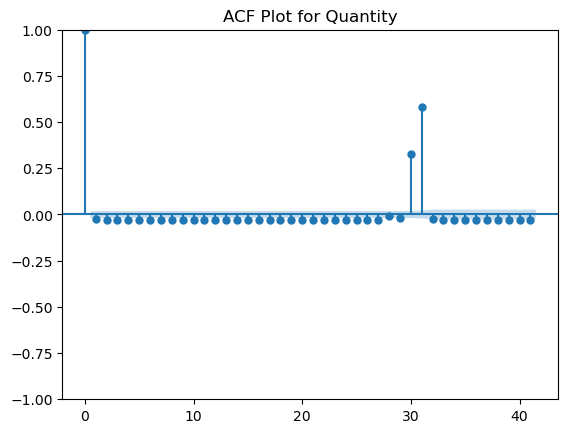

In [16]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(data['quantity'])
plt.title('ACF Plot for Quantity')
plt.show()

    ** Looking into this plot we can't really say weather it is stationary or not. So, we will go for augmented dicky-fuller test.

In [17]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    if result[1] > 0.05:
        print("The series is non-stationary.")
    else:
        print("The series is stationary.")

# Check stationarity of 'quantity'
check_stationarity(data['quantity'])

ADF Statistic: -7.218396175361655
p-value: 2.1430333968041891e-10
Critical Value (1%): -3.430957265725434
Critical Value (5%): -2.8618083774429204
Critical Value (10%): -2.5669128521764804
The series is stationary.


## ARIMA Model using cross validation method

In [18]:
data.shape

(10810, 8)

In [19]:
Qtrain = data[:9000]
Qtest = data[9000:]
print('Shape of data:',data.shape)
print('Shape of Train:',Qtrain.shape)
print('Shape of Test:',Qtest.shape)

Shape of data: (10810, 8)
Shape of Train: (9000, 8)
Shape of Test: (1810, 8)


In [20]:
import itertools
from tqdm import tqdm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Example column index (0 for the first column)
column_index = 6

# Ensuring the data is numeric and select the specific column
Qtrain_col = pd.to_numeric(Qtrain.iloc[:, column_index], errors='coerce').dropna()
Qtest_col = pd.to_numeric(Qtest.iloc[:, column_index], errors='coerce').dropna()

p = range(0, 4)
d = range(0, 1)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))

MSE = []
Parameter = []

for x in tqdm(pdq):
    try:
        Model = ARIMA(Qtrain_col, order=x).fit()
        QPredict = Model.forecast(steps=len(Qtest_col))
        mse = mean_squared_error(Qtest_col, QPredict)
        MSE.append(mse)
        Parameter.append(x)
        print(f"Order: {x}, MSE: {mse}")
    except Exception as e:
        print(f"Error with order {x}: {e}")

# Displaying the best parameters and corresponding MSE
if MSE:  # Checking if MSE list is not empty
    best_index = np.argmin(MSE)
    print(f"Best parameters: {Parameter[best_index]} with MSE: {MSE[best_index]}")
else:
    print("No valid models found.")


  8%|██████▉                                                                            | 1/12 [00:00<00:07,  1.48it/s]

Order: (0, 0, 0), MSE: 0.044969670184925974


 17%|█████████████▊                                                                     | 2/12 [00:01<00:06,  1.65it/s]

Order: (0, 0, 1), MSE: 0.04496970936062836


 25%|████████████████████▊                                                              | 3/12 [00:02<00:07,  1.16it/s]

Order: (0, 0, 2), MSE: 0.04496985956140071


 33%|███████████████████████████▋                                                       | 4/12 [00:03<00:07,  1.07it/s]

Order: (1, 0, 0), MSE: 0.04496970637835439


 42%|██████████████████████████████████▌                                                | 5/12 [00:08<00:16,  2.42s/it]

Order: (1, 0, 1), MSE: 0.04497212759303987


 50%|█████████████████████████████████████████▌                                         | 6/12 [00:16<00:25,  4.20s/it]

Order: (1, 0, 2), MSE: 0.04497180176704055


 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:16<00:15,  3.04s/it]

Order: (2, 0, 0), MSE: 0.04496982088135642


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:26<00:20,  5.22s/it]

Order: (2, 0, 1), MSE: 0.04497180688404792


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:32<00:16,  5.43s/it]

Order: (2, 0, 2), MSE: 0.04497211008226722


 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [00:33<00:07,  3.96s/it]

Order: (3, 0, 0), MSE: 0.04496999420281298


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:39<00:04,  4.81s/it]

Order: (3, 0, 1), MSE: 0.04497281528322389


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:47<00:00,  3.93s/it]

Order: (3, 0, 2), MSE: 0.04497264120980765
Best parameters: (0, 0, 0) with MSE: 0.044969670184925974


In [21]:
# Leasting MSE with index and Best (p,d,q) combination:
print('MSE:',min(MSE),'Index:',np.argmin(MSE))
Index=np.argmin(MSE)
print('(p,d,q):',Parameter[Index])
QParam=Parameter[Index]

MSE: 0.044969670184925974 Index: 0
(p,d,q): (0, 0, 0)


In [22]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Defining a function to fit ARIMA model and evaluate
def fit_arima(train, validate):
    # Fit ARIMA model
    model = ARIMA(train['quantity'], order=(2, 0, 1))
    model_fit = model.fit()

    # Making predictions
    forecast = model_fit.forecast(steps=len(validate))

    # Calculating error (e.g., RMSE)
    rmse = mean_squared_error(validate['quantity'], forecast, squared=False)

    return rmse

# Initializing lists to store evaluation results
rmse_scores = []

# Performing nested cross-validation
cv = NestedCV(k)
splits = cv.split(data, "date")

for train, validate, test in splits:
    rmse = fit_arima(train, validate)
    rmse_scores.append(rmse)

# Calculating mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)

Mean RMSE: 102381.86208085346


# Conclusion

**The nested time series cross-validation strategy implemented in this project has been successfully tested and used to evaluate a SARIMA model on the provided dataset. The evaluation resulted in a Mean RMSE (Root Mean Squared Error) of 102381.86.**

## Testing the code with "test.csv" data

In [23]:
if __name__ == "__main__":
    # Loading and preprocessing dataset
    data = pd.read_csv("test.csv")
    data["date"] = pd.to_datetime(data["date"])
    data = data.sort_values(by="date")
    data = data.fillna(method='ffill')
    data = data.drop_duplicates()
    data = data.drop(['id','lat','long','pop'],axis=1)   # dropping unneccesary columns
    
    # Aggregating data for duplicate dates
    data = data.groupby(['date','city']).agg({
        'shop': 'first',
        'brand': 'first',
        'container': 'first',
        'capacity': 'first',
        'price': 'mean',
        'quantity': 'sum'
    }).reset_index()
    
    
    # Resampling to daily frequency within each city
    resampled_data = []
    cities = data['city'].unique()

    for city in cities:
        city_data = data[data['city'] == city].set_index('date').resample('D').asfreq().reset_index()
        city_data['city'] = city
        resampled_data.append(city_data)

    data = pd.concat(resampled_data).reset_index(drop=True)
    data = data.fillna(0)

    

    # Initializing NestedCV with k-folds
    k = 5
    cv = NestedCV(k)
    splits = cv.split(data, "date")

    # Checking return type
    assert isinstance(splits, GeneratorType)

    # Checking return types, shapes, and data leaks
    count = 0
    for train, validate, test in splits:
        # Types
        assert isinstance(train, pd.DataFrame)
        assert isinstance(validate, pd.DataFrame)
        assert isinstance(test, pd.DataFrame)

        # Shape
        assert train.shape[1] == validate.shape[1] == test.shape[1]

        # Data leak
        assert train["date"].max() <= validate["date"].min()
        assert validate["date"].max() <= test["date"].min()

        count += 1

    # Checking number of splits returned
    assert count == k * (k + 1)
    print(f"Number of splits: {int(count/(k+1))}")

Number of splits: 5


In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Defining a function to fit ARIMA model and evaluate
def fit_arima(train, validate):
    # Fit ARIMA model
    model = ARIMA(train['quantity'], order=(2, 0, 1))
    model_fit = model.fit()

    # Making predictions
    forecast = model_fit.forecast(steps=len(validate))

    # Calculating error (e.g., RMSE)
    rmse = mean_squared_error(validate['quantity'], forecast, squared=False)

    return rmse

# Initializing lists to store evaluation results
rmse_scores = []

# Performing nested cross-validation
cv = NestedCV(k)
splits = cv.split(data, "date")

for train, validate, test in splits:
    rmse = fit_arima(train, validate)
    rmse_scores.append(rmse)

# Calculating mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)

Mean RMSE: 86433.84142321168


# Challenges

**Data Quality:** Ensuring the accuracy and completeness of data, especially with respect to dates and quantities.

**Seasonality and Trends:** Correctly identifying and adjusting for seasonality and long-term trends in the sales data.

**External Factors:** Accounting for external factors such as marketing campaigns, holidays, and economic conditions that can influence sales.


# Tools and Techniques

**Pandas:** For data manipulation and preprocessing.
**Scikit-learn:** For implementing machine learning models and cross-validation strategies.
**Statsmodels:** For time series analysis and forecasting.